# `GeoPandas` demo

[GeoPandas](http://geopandas.org/) is an extension of Pandas. A `GeoDataFrame` is just like a normal DataFrame, except each record has a [`shapely`](https://shapely.readthedocs.io/en/stable/manual.html) geometry attached. This geometry can be a point, a line, or a polygon.

GeoDataFrames can easily be saved as SHP or GeoJSON.

In [1]:
import geopandas as gp

## Read a shapefile

This shapefile was written by QGIS.

In [3]:
df = gp.read_file("../data/offshore_wells_2011_UTM20_NAD83.shp")

In [4]:
df.head()

,Company,D__,Drilling_U,RT_Elevati,Spud_Date,Total_De_1,Total_Dept,Water_Dept,Well_Nam_1,Well_Name,Well_No_,Well_Symb,Well_Termi,Well_Type,seafl_twt_,geometry
0,Mobil et al,1.0,Bawden Rig 18,8.2,1967-06-07,15106.0,4604.0,3.9,C-67,Sable Island,1.0,Plugged dry hole,1968-01-02,Exploratory,5.252525,POINT (747510.437 4869250.819)
1,Shell,2.0,Sedneth 1,25.9,1969-09-01,13085.0,3988.0,57.9,E-84,Onondaga,2.0,Plugged gas well,1969-11-11,Exploratory,77.979798,POINT (723875.297 4844664.070)
2,Shell,3.0,Sedneth 1,25.9,1969-11-16,13516.0,4120.0,82.3,O-25,Oneida,3.0,Plugged dry hole,1970-02-10,Exploratory,110.841751,POINT (616945.851 4789511.343)
3,Shell,4.0,Sedneth 1,26.0,1970-02-16,7235.0,2205.0,95.1,N-30,Naskapi,4.0,Plugged dry hole,1970-03-19,Exploratory,128.080808,POINT (535101.418 4816032.927)
4,Shell,5.0,Sedco H,31.4,1970-05-03,6975.0,2126.0,117.0,B-93,Mohawk,5.0,Plugged dry hole,1970-05-23,Exploratory,157.575758,POINT (358242.752 4729291.711)


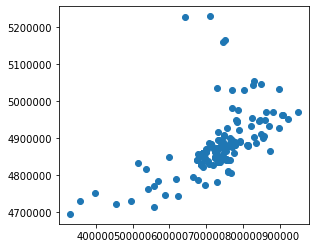

In [5]:
df.plot()

The CRS is stored as [an EPSG code](https://spatialreference.org/ref/epsg/).

In [6]:
df.crs

{'init': 'epsg:26920'}

## Define a polygon

In [7]:
from shapely.geometry import Polygon

poly = Polygon([
    [700_000, 4_800_000],
    [800_000, 4_800_000],
    [800_000, 4_950_000],
    [700_000, 4_950_000],
])

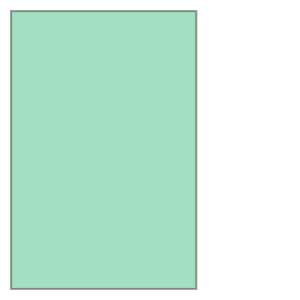

In [8]:
poly

In [9]:
dp = gp.GeoDataFrame(geometry=[poly], crs=df.crs)

In [10]:
dp

,geometry
0,"POLYGON ((700000.000 4800000.000, 800000.000 4..."


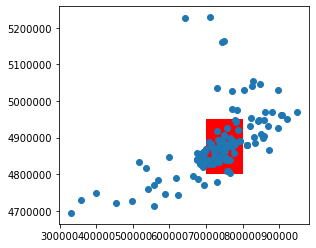

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax = dp.plot(ax=ax, color='r')
ax = df.plot(ax=ax)

## Intersect wells and polygon

We can intersect the well dataframe `df` with the Shapely polygon:

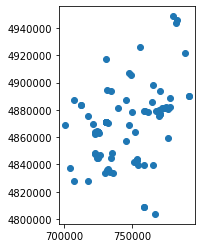

In [13]:
dg = df[df.intersects(poly)]

dg.plot()

## Write a shapefile

In [14]:
dg.to_file('../../data/Wells_in_polygon.shp')  # Can also save as GeoJSON